# import libraries

In [3]:
import os
import sys
import time

import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from audiolazy import str2midi 
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [2]:
note_names = []

note_names = 
# scale_selection = 0

# TODO: change to dictionary

# Option 0: using 88 consecutive notes
if(scale_selection == 0):
    for i in range(10,98):
        note_names.append(i)
    isNoteStr = False
    

# Option 1: using 100 consecutive notes
if(scale_selection == 1):
    for i in range(10,110):
        note_names.append(i)
    isNoteStr = False


# 4 octaves of major scale
elif(scale_selection == 2):
    note_names = ['C2','D2','E2','F2','G2','A2','B2',
                 'C3','D3','E3','F3','G3','A3','B3',
                 'C4','D4','E4','F4','G4','A4','B4',
                 'C5','D5','E5','F5','G5','A5','B5']
    isNoteStr = True

#4 octaves of major pentatonic scale 
elif(scale_selection == 3):
    note_names = ['C2','D2','E2','G2','A2',
                 'C3','D3','E3','G3','A3',
                 'C4','D4','E4','G4','A4',
                 'C5','D5','E5','G5','A5']
    isNoteStr = True

#custom note set (a voicing of a Cmaj13#11 chord, notes from C lydian)
elif(scale_selection == 4):
    note_names = ['C1','C2','G2',
                 'C3','E3','G3','A3','B3',
                 'D4','E4','G4','A4','B4',
                 'D5','E5','G5','A5','B5',
                 'D6','E6','F#6','G6','A6']
    isNoteStr = True

else: 
    print("please select available scale")
# print(note_names)
# note_names = ['C1','D1','E1','F1','G1','A1','B1',
#               'C2','D2','E2','F2','G2','A2','B2',
#              'C3','D3','E3','F3','G3','A3','B3',
#              'C4','D4','E4','F4','G4','A4','B4',
#              'C5','D5','E5','F5','G5','A5','B5',
#              'C6','D6','E6','F6','G6']
# isNoteStr = True

if(isNoteStr):
    # print(note_names)
    note_midis = [str2midi(n) for n in note_names] #make a list of midi note numbers 
else:
    note_midis = note_names
# print(note_midis)

num_notes = len(note_midis)
print('Resolution:',num_notes, 'notes')

select scale: ( 0) 10~98 1) 10~109 2) major 3) pentatonic 4) C lydian) 0


please select available scale
Resolution: 88 notes


In [3]:
printFlag = True   # for debugging process
testFlag = False

if(testFlag):
    # video = "lp7.mov"
    video = 'test.mp4'
    # cap = cv.VideoCapture(video)
    cap = cv.VideoCapture("./video/" + video)
else:
    video = str(input('Video to use: '))
    if (video == "rt"): 
        video = int(0)
        cap = cv.VideoCapture(video)
    else:
        cap = cv.VideoCapture("./video/" + video)


### image preprocessing ###
# w = 1
# h = 480 * 2
# y = 1080 // 2 - w // 2
# x = 1920 // 2 - h // 2

# ret = a boolean return value from getting the frame, first_frame = the first frame in the entire video sequence
ret, first_frame = cap.read()   # read the very first frame
print("video size in pixel: ", np.shape(first_frame))
if(testFlag):
    isManual = bool(False)
else:
    isManual = str(input('Select ROI in manual? (y/n):'))
    if (isManual == "y"):
        isManual = bool(True)
    else:
        isManual = bool(False)

if(isManual):
    # if want to select area manually
    x, y, w, h = cv.selectROI('mouse', first_frame, False)
    print("x_pos, y_pos: ", x, y)
    print("width, height: ", w, h)
    cv.waitKey(1)
    cv.destroyWindow('mouse')
    cv.destroyAllWindows()
    cv.waitKey(1)
else:
    x, y, w = np.shape(first_frame)[0] // 2, 50, 0
    if(np.shape(first_frame)[1] < 2000):
        h = 88*5
    else:
        h = 88*10
    # x, y, w, h = 1080, 75, 0, 1000

magnitude = []
frame_num = []

frame_cnt = 0
threshold = 10
leap = int(input('leap: '))
# leap = 1

if h % num_notes == 0:
    num_area = (h // num_notes) 
else:
    num_area = (h // num_notes) + 1

if(printFlag):
    print("first_frame shape: ", np.shape(first_frame))
    print("x: ", x)
    print("y: ", y)
    print("w: ", w)
    print("h: ", h)
    print("threshold: ", threshold)
    print("leap: ", leap)
    print("num_notes: ", num_notes)
    print("num_area: ", num_area)
    
    
while(True):
    # print(frame_cnt)
    ret, frame = cap.read()
    if not ret:
        print('video error')
        cv.waitKey(1)
        cv.destroyAllWindows()
        cv.waitKey(1)
        break
    frame_cnt += 1
    roi = frame[y:y+h, x:x+w]
    cv.imshow("realtime test", roi)
    # if(printFlag):
        # print(np.shape(roi))
    roi_gray = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
    # if(printFlag):
        # print(roi_gray)
    # print(np.shape(roi_gray))
    accumulated_pixel_color = 0
    if frame_cnt % leap == 0:
        for i in range(h): 
            if i is (h-1):
                # if(printFlag):
                    # print(frame_cnt)
                cnt = i % num_area
                if((accumulated_pixel_color // cnt) < threshold):
                    accumulated_pixel_color = bound
                avg_color = accumulated_pixel_color // cnt
                mag = avg_color
                # normalize function
                # NOTE: Modify this.
                # mag = mag ** 2 // 100
                magnitude.append(mag)
                age.append(frame_cnt)
                accumulated_pixel_color = 0
            elif (i % num_area) is (num_area - 1):
                # if(printFlag):
                #     print(frame_cnt)
                # white = 255, black = 0. if whiter than 200, cap it to max_white
                if((accumulated_pixel_color // num_area) < bound):
                    accumulated_pixel_color = 0
                avg_color = accumulated_pixel_color // num_area
                mag = avg_color
                # normalize function
                # NOTE: Modify this.
                # mag = mag ** 2 // 100
                magnitude.append(mag)
                age.append(frame_cnt)
                accumulated_pixel_color = 0
            else:
                accumulated_pixel_color += (255 - roi_gray[i][0])
                # if(printFlag):
                    # print(roi_gray[i][0])
        # if(printFlag):            
            # cv.imshow('roi', frame)
        if cv.waitKey(1) & 0xff == ord('q'):
            break
        
print("calculation done")
dict = {'magnitude': magnitude, 'age': age}
# if(printFlag):
    # print(dict)
cv.destroyAllWindows()
cv.waitKey(1)

# The following frees up resources and closes all windows
cap.release()
cv.destroyAllWindows()

Video to use:  rt


video size in pixel:  (1080, 1920, 3)


Select ROI in manual? (y/n): y


x_pos, y_pos:  77 60
width, height:  1021 871


leap:  1


first_frame shape:  (1080, 1920, 3)
x:  77
y:  60
w:  1021
h:  871
bound:  10
leap:  1
num_notes:  88
num_area:  10


KeyboardInterrupt: 

In [161]:
# filename = 'test1'  #name of csv data file

# df = pd.read_csv('./data/' + filename + '.csv')  #load data as a pandas dataframe

# push dictionary into df
df = pd.DataFrame(dict)
#df = df[(df['diameter'] >= 20)] #filter data if you like (for example, only craters larger than 20km)
# df = df.sort_values(by=['age'], ascending=False) #sort data from oldest to youngest (optional, doesn't affect the sonification)
# df = df.sort_index(ascending=False)

n_impacts = len(df)
print(n_impacts, 'impacts')

df.head() #take a look at first 5 rows
#df.tail() #take a look at last 5 rows

9152 impacts


,magnitude,age
0,15,1
1,14,1
2,15,1
3,15,1
4,15,1


In [162]:
# 저장
tempo = 60
dirVideo = str(video)[:len(video)-4]
dirScale = str(scale_selection)


newFolderName = f"./saved/{dir_video}/{dir_scale}/bpm{tempo}_{leap}_{threshold}"
os.makedirs(newFolderName, exist_ok=True)
f = open(newFolderName+"/spec.txt",'w')
f.write("video: " + str(video) + "\n")
f.write("frame #: " + str(frame_cnt) + "\n")
f.write("leap: " + str(leap) + "\n")
f.write("bound: " + str(threshold) + "\n")
f.write("used scale: " + str(note_names) + "\n")
f.close()
cv.imwrite(newFolderName+"/lp.png", first_frame)
df.to_pickle(newFolderName+"/df.pkl")


wanna save?: (y/n) n


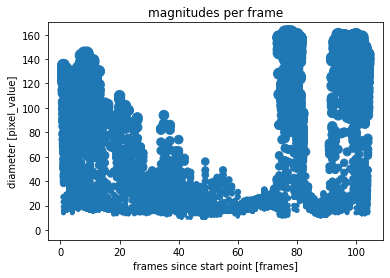

In [163]:
ages = df['age'].values    #this is a numpy array (not a list), you can do mathematical operations directly on the object
# print(ages)
magnitudes = df['magnitude'].values 
indexes = df.index.values
# print(indexes)

# plt.scatter(ages, magnitudes, s=magnitudes)
# plt.xlabel('age [Myrs]')
# plt.ylabel('diameter [km]')
# plt.show()

# times_myrs = max(ages) - ages  #measure time from oldest crater (first impact) in data
times_myrs = ages

# fig = plt.figure(figsize=(8,6))

# plt.plot(times_myrs, magnitudes)
plt.title('magnitudes per frame')
plt.scatter(times_myrs, magnitudes, s=magnitudes)
plt.xlabel('frames since start point [frames]')
plt.ylabel('diameter [pixel_value]')
# plt.plot(x, y)
# plt.show()
plt.savefig(newFolderName+'/mag_per_frame.png', transparent= True)

In [164]:
def map_value(value, min_value, max_value, min_result, max_result):
    '''maps value (or array of values) from one range to another'''
    
    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result

In [165]:
myrs_per_beat = 60  #number of Myrs for each beat of music 
t_data = times_myrs/myrs_per_beat #rescale time from Myrs to beats
duration_beats = max(t_data)  #duration in beats (actually, onset of last note)
print('Duration:', duration_beats, 'beats')

Duration: 1.7333333333333334 beats


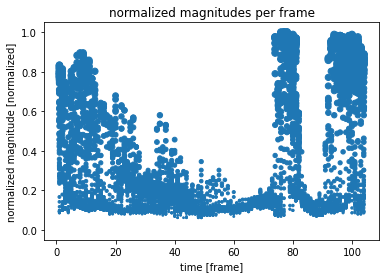

In [166]:
norm_magnitude = map_value(magnitudes, min(magnitudes), max(magnitudes), 0, 1) #normalize data, so it runs from 0 to 1 

norm_scale = 1  #lower than 1 to spread out more evenly

norm_magnitude = norm_magnitude**norm_scale

# print(norm_magnitude)
# print(np.shape(norm_magnitude))
# plt.plot(times_myrs, norm_magnitude)
plt.title('normalized magnitudes per frame')
plt.scatter(times_myrs, norm_magnitude, s=50*norm_magnitude)
plt.xlabel('time [frame]')
plt.ylabel('normalized magnitude [normalized]')
# plt.show()
plt.savefig(newFolderName+'/norm_mag_per_frame.png')

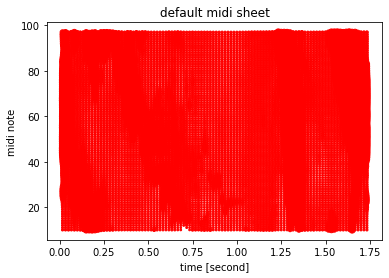

In [167]:
midi_data = []
for i in range(n_impacts):
    # note_index = round(map_value(y_data[i], 0, 1, 0, num_notes-1)) #notice choice of polarity: bigger craters are mapped to lower notes
                                                        #we round the result because it's a list index which must be an integer
    note_index = indexes[i] % num_notes
    # print(note_index.len())
    # print(note_index)
    midi_data.append(note_midis[note_index])

# plt.plot(t_data, midi_data)
# plt.rcParams['figure.facecolor'] = 'white'
plt.title('default midi sheet')
plt.scatter(t_data, midi_data, s=50*norm_magnitude, c = 'red')
plt.xlabel('time [second]')
plt.ylabel('midi note')
# plt.show()
plt.savefig(newFolderName+'/midi_default.png', dpi = 1000)

# test figures
num_notes = 88 <br>
note_midis = 10~97 <br>

In [168]:
print_w, print_h = 78.0, 106.0
coeff = 0.15

In [2]:
midi_data = []
for i in range(n_impacts):
    # note_index = round(map_value(y_data[i], 0, 1, 0, num_notes-1)) #notice choice of polarity: bigger craters are mapped to lower notes
                                                        #we round the result because it's a list index which must be an integer
    note_index = indexes[i] % num_notes
    # print(note_index.len())
    # print(note_index)
    midi_data.append(note_midis[note_index])


# plt.plot(figsize=(7.8, 10.6))
plt.figure(figsize=(print_h*coeff, print_w*coeff))
# plt.rcParams['figure.facecolor'] = 'white'
plt.title('default midi sheet')
plt.scatter(t_data, midi_data, s=110*norm_magnitude, c = 'green')
plt.xlabel('time [second]')
plt.ylabel('midi note')
plt.show()
# plt.savefig(newFolderName+'/midi_default.png', dpi = 1000)

NameError: name 'n_impacts' is not defined

In [170]:
vel_data[:5]

[50.91695465736418,
 50.91695465736418,
 111.59218692446753,
 112.5048002729383,
 114.32756959104283]

In [171]:
def note_mapping(value, min_value, max_value, min_result, max_result):
    '''maps value (or array of values) from one range to another'''
    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result

In [172]:
def note_mapping_nonlinear(value, min_value, max_value, min_result, max_result):
    '''maps value (or array of values) from one range to another using non-linear mapping'''
    scale = (value - min_value) / (max_value - min_value) # linear scaling to [0,1]
    result = min_result + ((max_result - min_result) * (scale ** 2)) # square for non-linear scaling
    return result

In [173]:
def fbm(n, H):
    """
    Create a Fractional Brownian Motion.
    n: length of the series.
    H: Hurst parameter, must be in the range (0, 1).
    """
    G = np.random.normal(size=(n,n))
    i = np.arange(1, n+1)
    GG = G / (np.abs(np.subtract.outer(i, i)) ** (2.*H))
    x = np.cumsum(np.sum(GG, axis=-1))
    return x / np.max(np.abs(x))

In [174]:
def fractal_mapping(value, min_value, max_value, min_result, max_result, depth=10):
    """Maps a value from one range to another using fractal-like, recursive division."""
    if depth <= 0:
        # Base case: Perform linear interpolation
        result = min_result + (value - min_value) / (max_value - min_value) * (max_result - min_result)
    else:
        # Recursive case: Determine which half of the range the value is in and recurse
        mid_value = (min_value + max_value) / 2
        mid_result = (min_result + max_result) / 2
        if value < mid_value:
            # Value is in the lower half of the range
            result = fractal_mapping(value, min_value, mid_value, min_result, mid_result, depth - 1)
        else:
            # Value is in the upper half of the range
            result = fractal_mapping(value, mid_value, max_value, mid_result, max_result, depth - 1)
    return result

In [175]:
def advanced_fractal_mapping(value, min_value, max_value, min_result, max_result, depth=10, frequency=5):
    """Maps a value from one range to another using an advanced fractal-like, recursive division with sine modulation."""
    if depth <= 0:
        # Base case: Perform linear interpolation
        result = min_result + (value - min_value) / (max_value - min_value) * (max_result - min_result)
    else:
        # Recursive case: Determine which half of the range the value is in and recurse
        mid_value = (min_value + max_value) / 2
        mid_result = (min_result + max_result) / 2
        if value < mid_value:
            # Value is in the lower half of the range
            result = advanced_fractal_mapping(value, min_value, mid_value, min_result, mid_result, depth - 1, frequency)
        else:
            # Value is in the upper half of the range
            result = advanced_fractal_mapping(value, mid_value, max_value, mid_result, max_result, depth - 1, frequency)

    # Add sine wave modulation based on the current depth and a chosen frequency
    result += (np.sin(value * frequency * 2 * np.pi / (max_value - min_value)) / 2**depth)

    return result


In [176]:
vel_data[:5]

[50.91695465736418,
 50.91695465736418,
 111.59218692446753,
 112.5048002729383,
 114.32756959104283]

In [89]:
vel_data[:5]

[46, 46, 110, 111, 113]

In [90]:
def gamma_correction(value, gamma):
    """Apply gamma correction to a value."""
    return ((value / 127.0) ** gamma) * 127.0

In [92]:
note_velocity

5

## real-time

In [ ]:
from pythonosc import udp_client
ip = "127.0.0.1"
port = 5555

client = udp_client.SimpleUDPClient(ip, port)

for x in range(50):
    client.send_message("/note", midi_data[(x)*88:(x+1)*88])
    client.send_message("/velocity", vel_data[(x)*88:(x+1)*88])
    time.sleep(0.5)

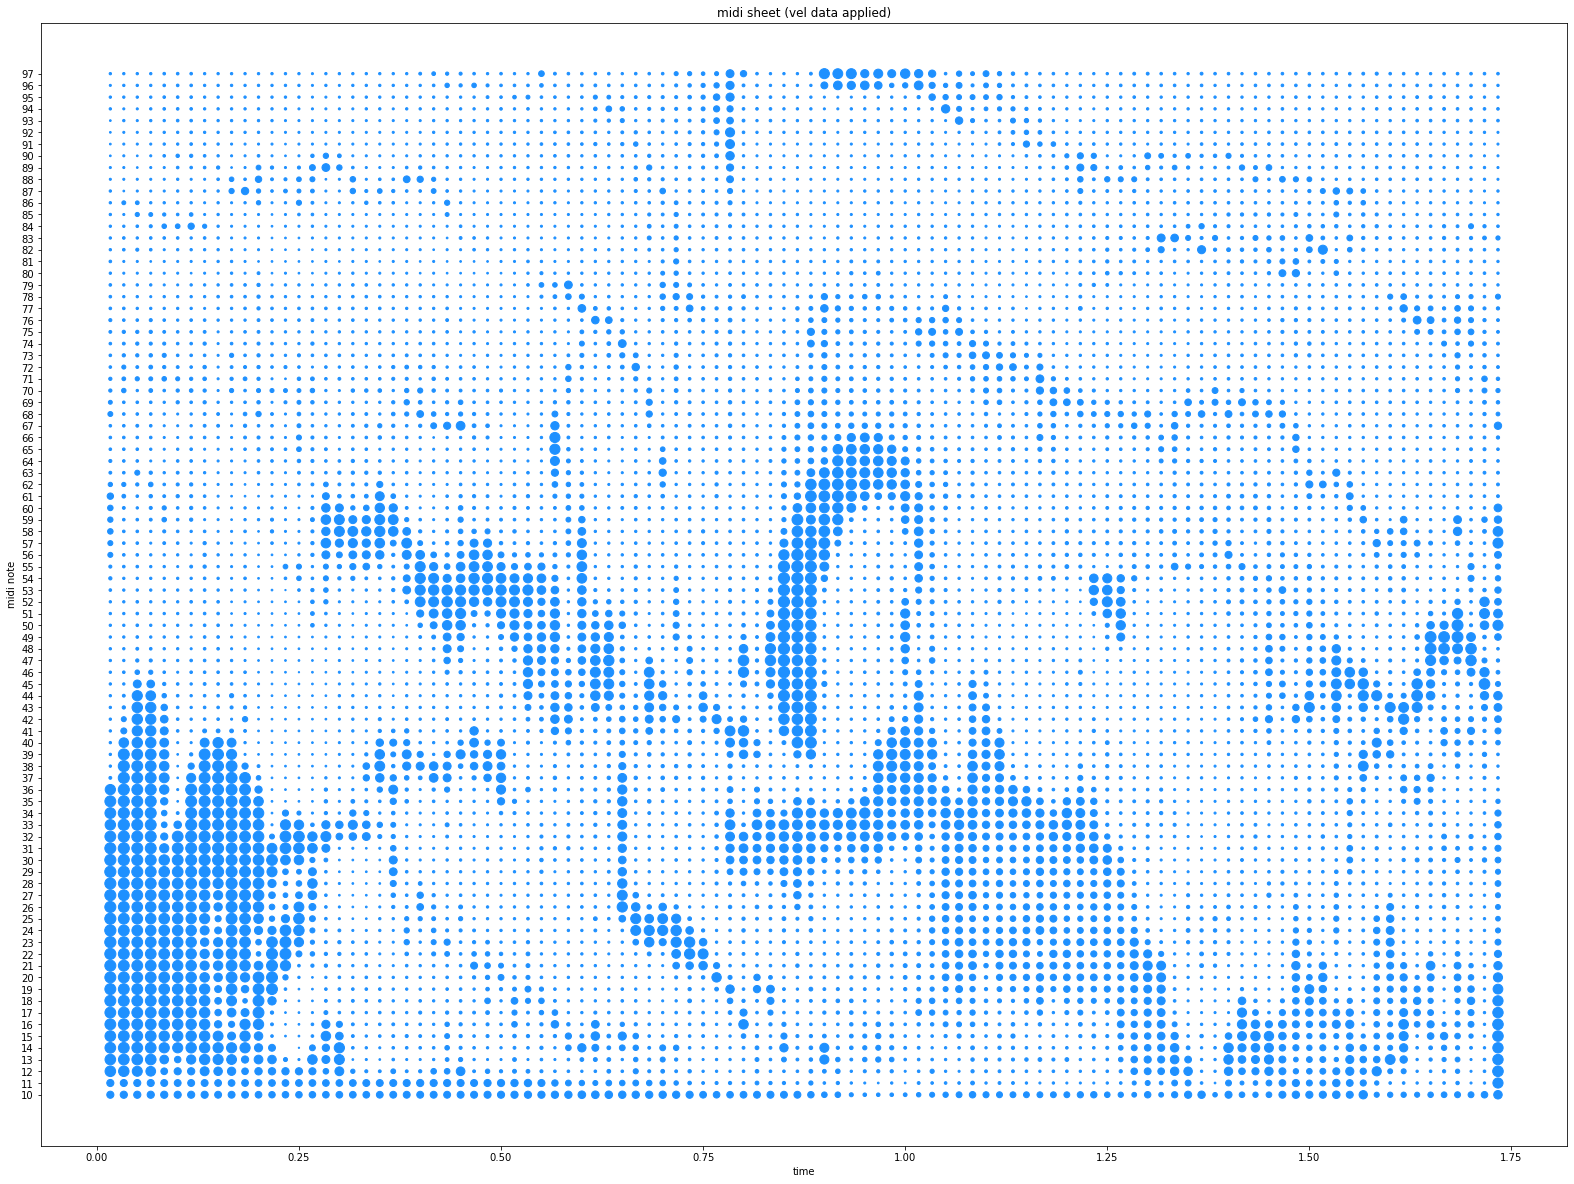

In [124]:
vel_min,vel_max =0,127 #minimum and maximum note velocity
coeff = 0.25
vel_data = []
for i in range(n_impacts):
    note_velocity = round(fractal_mapping(norm_magnitude[i]**1, 0, 1, vel_min, vel_max)) #bigger craters will be louder
    # note_velocity = round(advanced_fractal_mapping(norm_magnitude[i]**1, 0, 1, vel_min, vel_max)) #bigger craters will be louder
    # vel_data.append(note_velocity * 1)
    vel_data.append(gamma_correction(note_velocity, 0.9))

    
plt.figure(figsize=(print_h*coeff, print_w*coeff))
plt.title('midi sheet (vel data applied)')
plt.scatter(t_data, midi_data, s=vel_data, c='dodgerblue')
plt.xlabel('time') # time [beats]
plt.ylabel('midi note')
plt.yticks(np.arange(10, 98, 1), fontsize=10)

# plt.axis('off')
fig = plt.gcf()
ax = plt.gca()

# Hide top and right spines
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.show()
# plt.savefig(newFolderName+'/midi_vel.png')

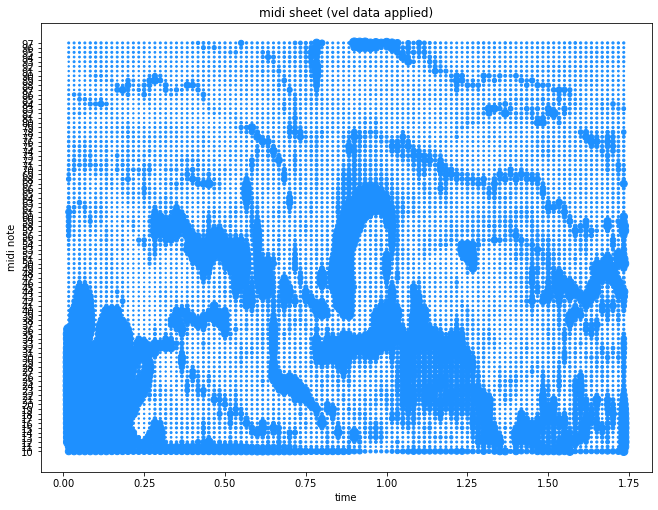

In [85]:
vel_min,vel_max =0,127 #minimum and maximum note velocity
coeff = 0.1
vel_data = []
for i in range(n_impacts):
    note_velocity = round(fractal_mapping(norm_magnitude[i]**1, 0, 1, vel_min, vel_max, depth=10)) #bigger craters will be louder
    vel_data.append(note_velocity * 1)
    
plt.figure(figsize=(print_h*coeff, print_w*coeff))
plt.title('midi sheet (vel data applied)')
plt.scatter(t_data, midi_data, s=vel_data, c='dodgerblue')
plt.xlabel('time') # time [beats]
plt.ylabel('midi note')
plt.yticks(np.arange(10, 98, 1), fontsize=10)

# plt.axis('off')
fig = plt.gcf()
ax = plt.gca()

# Hide top and right spines
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.show()
# plt.savefig(newFolderName+'/midi_vel.png')

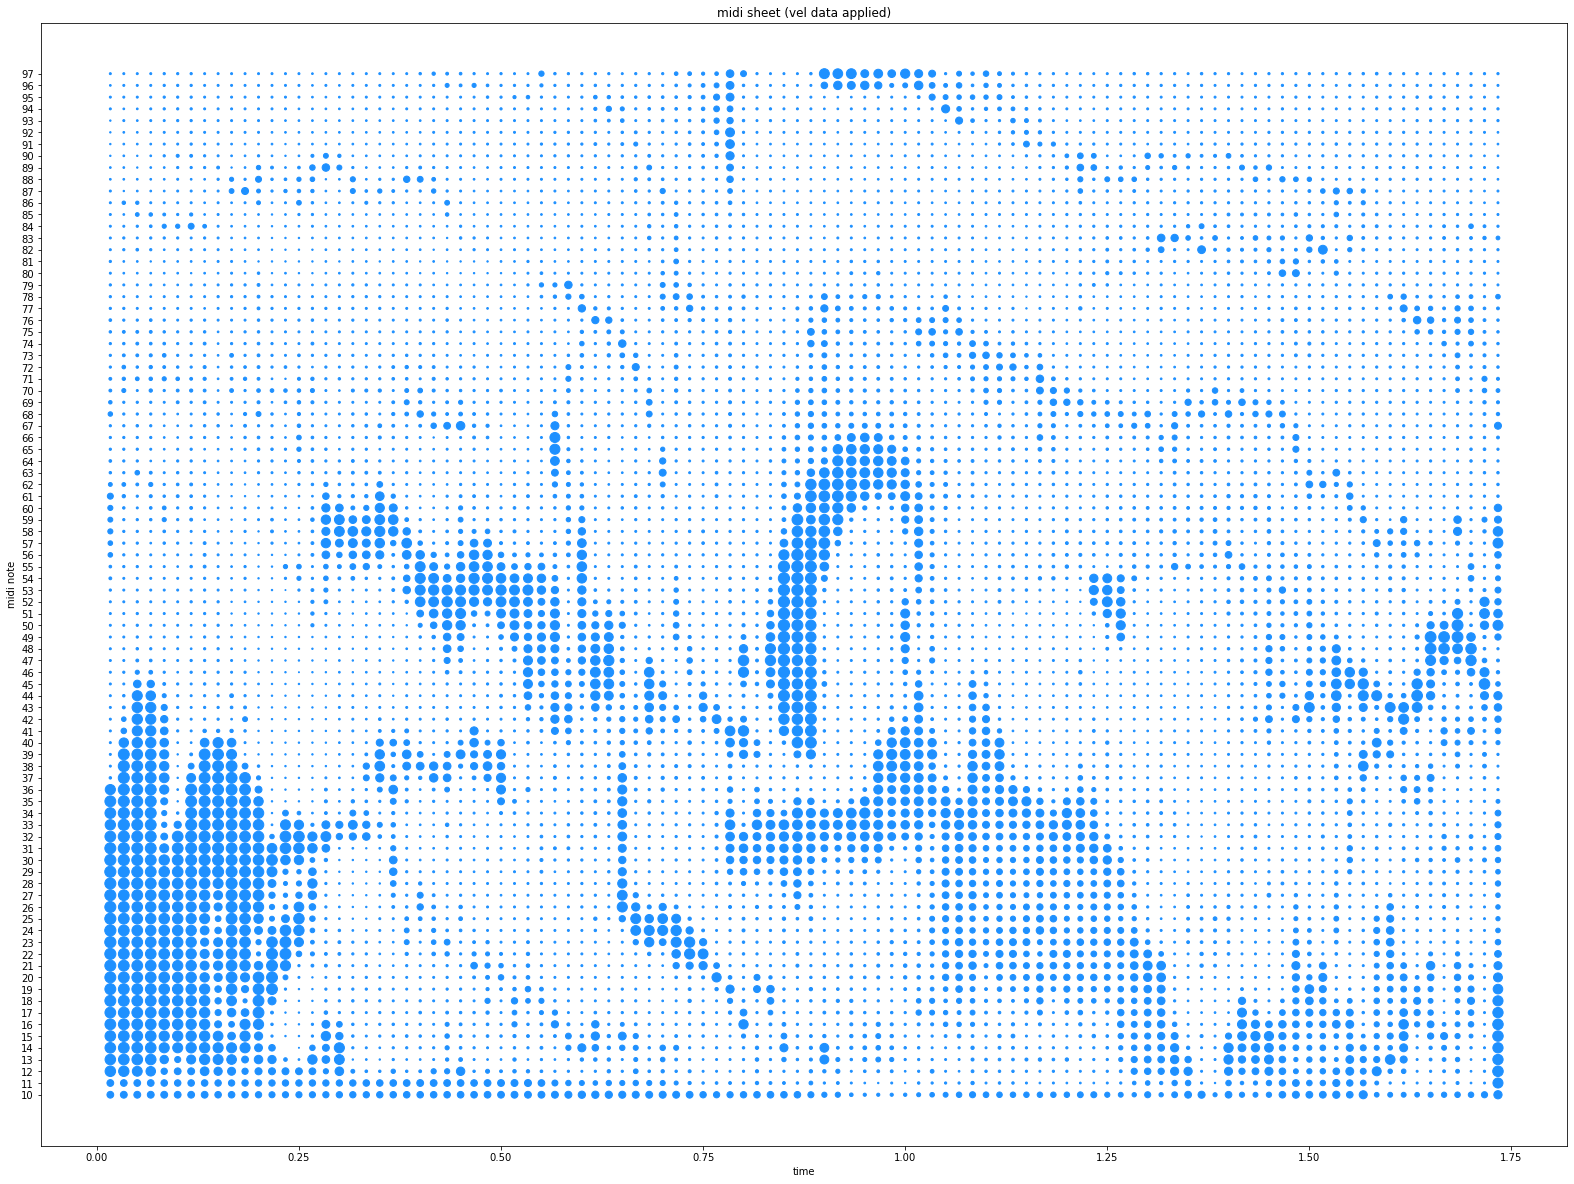

In [79]:
vel_min,vel_max =0,127 #minimum and maximum note velocity
coeff = 0.25
vel_data = []
for i in range(n_impacts):
    note_velocity = round(note_mapping(norm_magnitude[i]**1, 0, 1, vel_min, vel_max)) #bigger craters will be louder
    #we round here because note velocites are integers
    vel_data.append(note_velocity * 1)
    
# plt.rcParams['figure.facecolor'] = 'white'
# plt.scatter(t_data, midi_data, s=vel_data, c = '#FFFFFF')
# plt.plot(t_data, midi_data)
plt.figure(figsize=(print_h*coeff, print_w*coeff))
plt.title('midi sheet (vel data applied)')
plt.scatter(t_data, midi_data, s=vel_data, c='dodgerblue')
plt.xlabel('time') # time [beats]
plt.ylabel('midi note')
plt.yticks(np.arange(10, 98, 1), fontsize=10)

# plt.axis('off')
fig = plt.gcf()
ax = plt.gca()

# Hide top and right spines
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.show()
# plt.savefig(newFolderName+'/midi_vel.png')

In [ ]:
vel_min,vel_max =0,127 #minimum and maximum note velocity
coeff = 0.25
vel_data = []
for i in range(n_impacts):
    note_velocity = round(map_value(norm_magnitude[i]**1, 0, 1, vel_min, vel_max)) #bigger craters will be louder
    #we round here because note velocites are integers
    vel_data.append(note_velocity * 1)
    
# plt.rcParams['figure.facecolor'] = 'white'
# plt.scatter(t_data, midi_data, s=vel_data, c = '#FFFFFF')
# plt.plot(t_data, midi_data)
plt.figure(figsize=(print_h*coeff, print_w*coeff))
plt.title('midi sheet (vel data applied)')
plt.scatter(t_data, midi_data, s=vel_data, c='dodgerblue')
plt.xlabel('time') # time [beats]
plt.ylabel('midi note')
plt.yticks(np.arange(10, 98, 1), fontsize=10)

# plt.axis('off')
fig = plt.gcf()
ax = plt.gca()

# Hide top and right spines
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.show()
# plt.savefig(newFolderName+'/midi_vel.png')

In [11]:
#create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track 
# tp = 10
my_midi_file.addTempo(track=0, time=0, tempo=tp) 
#add midi notes
for i in range(n_impacts):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i], duration=0.05\
                         , volume=vel_data[i])

filename = 'midi_' + str(tp)
    
#create and save the midi file itself
with open(newFolderName + "/" + filename +'.mid', "wb") as f:
    my_midi_file.writeFile(f) 


In [12]:
!{sys.executable} -m pip install --quiet "pygame"  #install pygame with pip
#or use this if you installed python with anaconda
#conda install --yes --prefix {sys.prefix} pygame

midipath = newFolderName + "/" + filename
midifile = newFolderName + "/" + filename + '.mid'
fs = FluidSynth('./sound_font.sf2')
fs.midi_to_audio( midipath + '.mid', midipath + '.wav')

pygame.init()
# pygame.midi.init()
# pygame.midi.Input.read(newFolderName + "/" + filename + '.mid')
# pygame.midi.Output.set_instrument(19, channel=0)
pygame.mixer.music.load(midifile)
pygame.mixer.music.play()



pygame 2.4.0 (SDL 2.26.4, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html
FluidSynth runtime version 2.3.2
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file './saved/lp1_3_10_1_0/midi_10.wav'..


In [13]:
# import sys 
# !{sys.executable} -m pip install --quiet "pygame"  #install pygame with pip
# #or use this if you installed python with anaconda
# #conda install --yes --prefix {sys.prefix} pygame

# import pygame #import library for playing midi files, https://pypi.org/project/pygame/

# midifile = "./saved/test_3_1_0_copy" + "/" + filename + '.mid'

# pygame.init()
# # pygame.midi.init()
# # pygame.midi.Input.read(newFolderName + "/" + filename + '.mid')
# # pygame.midi.Output.set_instrument(19, channel=0)
# pygame.mixer.music.load(midifile)
# pygame.mixer.music.play()


In [14]:
# from midi2audio import FluidSynth

# !{sys.executable} -m pip install --quiet "midi2audio"  #install pygame with pip
# # check: https://pypi.org/project/midi2audio/

# # change defaults
# # use a custom sound font
# FluidSynth('sound_font.sf2')

# # use a custom sample rate
# FluidSynth(sample_rate=22050)

# fs.play_midi(midifile)
# fs.midi_to_audio(midifile, 'output.flac')

In [15]:
import pretty_midi
# Load MIDI file into PrettyMIDI object
midi_data = pretty_midi.PrettyMIDI(midifile)
cello_program = pretty_midi.instrument_name_to_program('Cello')
cello = pretty_midi.Instrument(program=cello_program)
midi_data.instruments.append(cello)
new_filename = 'cellomidi'
new_midifile = newFolderName + "/" + filename + '.mid'
midi_data.write(new_midifile)

/Users/starchaser/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  return f(*args, **kwargs)


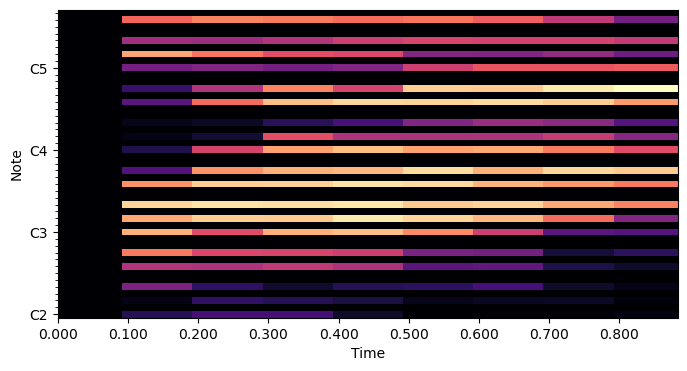

In [16]:
import librosa.display

pygame.init()
# pygame.midi.init()
# pygame.midi.Input.read(newFolderName + "/" + filename + '.mid')
# pygame.midi.Output.set_instrument(19, channel=0)
pygame.mixer.music.load(new_midifile)
pygame.mixer.music.play()

pm = pretty_midi.PrettyMIDI(new_midifile)
start_pitch = note_midis[0]
end_pitch = note_midis[-1]
fs = 60
plt.figure(figsize=(8, 4))
plt.xlim([0,duration_beats])
librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                         hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                         fmin=pretty_midi.note_number_to_hz(start_pitch))
plt.savefig(newFolderName+'/midi.png')
# plot_piano_roll(pm, note_midis[0], note_midis[-1])


In [17]:
# example usage for creating a simple MIDI file:

# import pretty_midi
# # Create a PrettyMIDI object
# cello_c_chord = pretty_midi.PrettyMIDI()
# # Create an Instrument instance for a cello instrument
# cello_program = pretty_midi.instrument_name_to_program('Cello')
# cello = pretty_midi.Instrument(program=cello_program)
# # Iterate over note names, which will be converted to note number later
# for note_name in ['C5', 'E5', 'G5']:
#     # Retrieve the MIDI note number for this note name
#     note_number = pretty_midi.note_name_to_number(note_name)
#     # Create a Note instance for this note, starting at 0s and ending at .5s
#     note = pretty_midi.Note(velocity=100, pitch=note_number, start=0, end=.5)
#     # Add it to our cello instrument
#     cello.notes.append(note)
# # Add the cello instrument to the PrettyMIDI object
# cello_c_chord.instruments.append(cello)
# # Write out the MIDI data
# cello_c_chord.write('cello-C-chord.mid')